Importing...
Found 1 result folders


100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


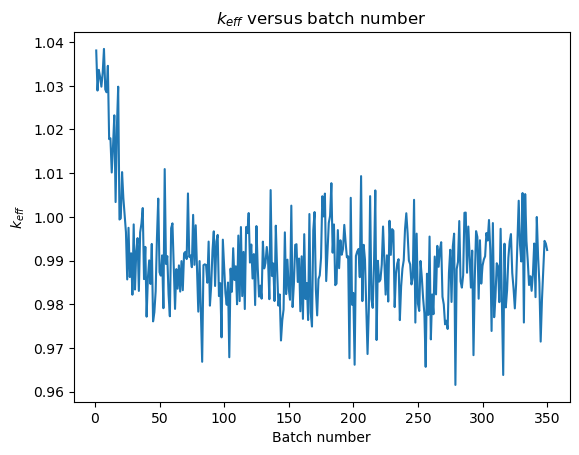

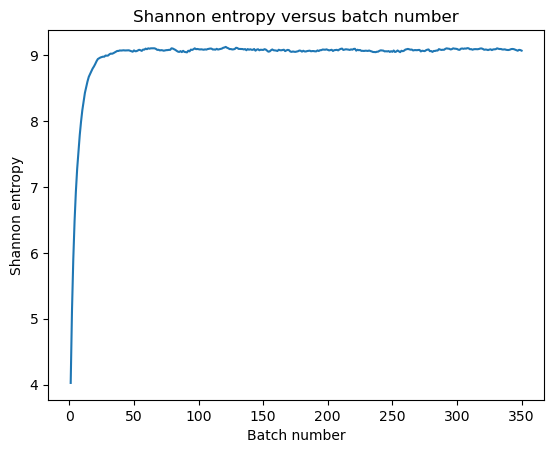

In [12]:
PROCESSES_COUNT = 30

print("Importing...")
from multiprocessing import Pool

import os
import sys
TOOLS_PATH = f"{os.getenv('MASTER_PROJECT_ROOT_FOLDER')}/logistics"
sys.path.insert(0, TOOLS_PATH)
from tools import run_tools, plot_tools, data_tools
import seaborn as sns
import openmc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from progressbar import progressbar
from tqdm import tqdm

results = []

result_folders = run_tools.get_all_result_dirs()
print(f"Found {len(result_folders)} result folders")

for result_folder in tqdm(result_folders):
    result_path = f"../results/{result_folder}"
    run_settings = run_tools.load_run_settings_json(result_path)

    statepoint_number = run_settings["active_batch_count"] + run_settings["inactive_batch_count"]
    sp = openmc.StatePoint(f"{result_path}/statepoint.{statepoint_number}.h5")

    # print(f"{len(sp.entropy)=}")
    # print(f"{len(sp.k_generation)=}")
    # print(sp.meshes)

    result = {
        "k-eff": sp.keff.nominal_value, 
        "k-eff-std": sp.keff.std_dev,  
        "result_path": result_path
    }

    result.update(run_settings)
    results.append(result)


    batches = np.arange(1, statepoint_number + 1)

    plt.figure()
    sns.lineplot(x=batches, y=sp.k_generation)
    plt.title(f"$k_{{eff}}$ versus batch number")
    plt.xlabel("Batch number")
    plt.ylabel("$k_{{eff}}$")
    plt.savefig(f"k_eff_vs_batch_number.pdf")

    plt.figure()
    sns.lineplot(x=batches, y=sp.entropy)
    plt.title(f"Shannon entropy versus batch number")
    plt.xlabel("Batch number")
    plt.ylabel("Shannon entropy")
    plt.savefig(f"shannon_entropy_vs_batch_number.pdf")

